# THE CHALLENGE

The problem we will be looking at is an image classification task on X-ray scans of the human body.

In this example, we focus on images of the spine which are frequently used during the planning of surgical procedures. 

An automated analysis of such images is thus an important feature.

The first step in such a process is to detect in which direction the X-ray was taken. Roughly speaking, there are two ways:

1. The X-rays traverse the body from front to back (or back to front). We call such images AP (stands for „anteroposterior”).

2. The X-rays traverse the body from left to right (or right to left). We call such images lateral.




In [21]:
import os 

from matplotlib import pyplot
from matplotlib.image import imread

from numpy import asarray
from numpy import save

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


# data exploration and preparation


In [15]:
# define location of dataset
train_folder = '../SnkeOS_MLENgineer_ChallengeData/Train/'
test_folder = '../SnkeOS_MLENgineer_ChallengeData/Test/'

train_image_file = 'train_images.npy'
train_image_label = 'train_labels.npy'

test_image_file = 'test_images.npy'
test_image_label = 'test_labels.npy'

img_size = (256, 256)

lateral_label = 'Lateral'
ap_label = 'AP'


In [24]:
def save_img_labels(folder, 
                    images_file,
                    labels_file,
                    lateral_label='Lateral', 
                    ap_label='AP',
                    img_size=(256, 256),
                   ):
    lateral_files = []
    ap_files = []
    files = []
    labels = list()
    images = list()

    for file_name in os.listdir(folder):
        label = ''
        if lateral_label in file_name:
            lateral_files.append(folder + file_name)
            label = 'Lateral'
        if ap_label in file_name:
            ap_files.append(folder + file_name)
            label = 'AP'
            
        files.append(folder + file_name)
        labels.append(label)
        # load image
        image = load_img(folder + file_name, target_size=img_size)
        # convert to numpy array
        image = img_to_array(image)
        images.append(image)

    # convert to a numpy arrays
    images = asarray(images)
    labels = asarray(labels)
    print(images.shape, labels.shape)

    # save the images
    save(images_file, images)
    save(labels_file, labels)
    
    return images, labels, lateral_files, ap_files
    
    

In [25]:
train_images, train_labels, train_lateral_files, train_ap_files = save_img_labels(folder=train_folder, 
                                                                                  images_file=train_image_file,
                                                                                  labels_file=train_image_label,
                                                                                 )
                

(190, 256, 256, 3) (190,)


In [26]:
test_images, test_labels, test_lateral_files, test_ap_files = save_img_labels(folder=test_folder, 
                                                                              images_file=test_image_file,
                                                                              labels_file=test_image_label,
                                                                             )


(27, 256, 256, 3) (27,)


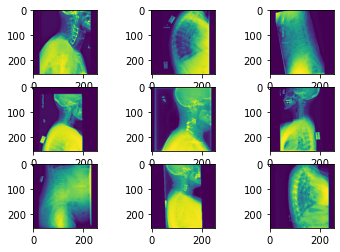

In [30]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = train_lateral_files[i]
    image = imread(filename)
    pyplot.imshow(image)

pyplot.show()



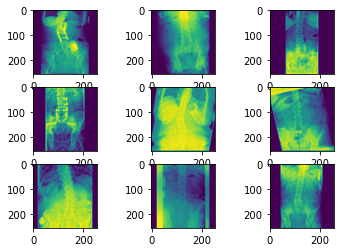

In [31]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = train_ap_files[i]
    image = imread(filename)
    pyplot.imshow(image)

pyplot.show()


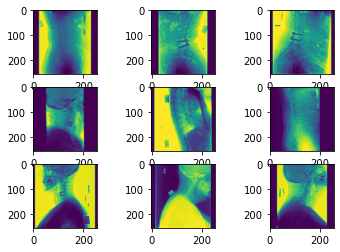

In [32]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = test_lateral_files[i]
    image = imread(filename)
    pyplot.imshow(image)

pyplot.show()


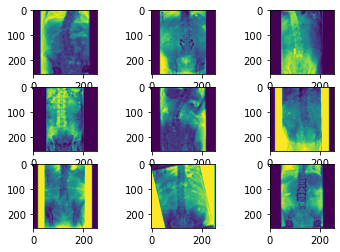

In [33]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = test_ap_files[i]
    image = imread(filename)
    pyplot.imshow(image)

pyplot.show()


# model creation


# result evaluation


# troubleshooting
